In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.optimizers import Adam


img_width, img_height = 224,224

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "/Users/faye/miniforge3/envs/kf6007/bin/python"
  * The NumPy version is: "1.21.1"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: dlopen(/Users/faye/miniforge3/envs/kf6007/lib/python3.9/site-packages/numpy/core/_multiarray_umath.cpython-39-darwin.so, 2): Library not loaded: @rpath/libcblas.3.dylib
  Referenced from: /Users/faye/miniforge3/envs/kf6007/lib/python3.9/site-packages/numpy/core/_multiarray_umath.cpython-39-darwin.so
  Reason: image not found


Text(0.5, 1.0, 'Scaled 224x224')

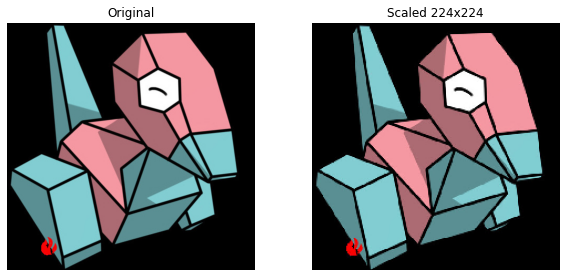

In [ ]:
img = imread("PokemonData/Poke_train/Porygon/2e3b56a84357460da999be7610c5b384.jpg")
fig = plt.figure(figsize=(10,10))
fig.add_subplot(2,2,1)
plt.imshow(img)
plt.axis('off')
plt.title("Original")

''' Customs scaling function'''
def scale(im, nR, nC):
    number_rows = len(im)     # source number of rows 
    number_columns = len(im[0])  # source number of columns 
    return [[ im[int(number_rows * r / nR)][int(number_columns * c / nC)]  
                 for c in range(nC)] for r in range(nR)]

res = scale(img, 224, 224)
fig.add_subplot(2,2,2)
plt.imshow(res)
plt.axis('off')
plt.title("Scaled 224x224")

In [ ]:
train_data_dir = 'PokemonData/Poke_Train'
validation_data_dir = 'PokemonData/Poke_Test'

nb_train_samples =400
nb_validation_samples = 100

epochs = 10
batch_size = 16

In [ ]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 6820 images belonging to 150 classes.
Found 1944 images belonging to 150 classes.


' model.fit(\n    train_generator,\n    steps_per_epoch=nb_train_samples // batch_size,\n    epochs=epochs,\n    validation_data=validation_generator,\n    validation_steps=nb_validation_samples // batch_size) '